
# Project: Analysis of The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, I will be analysing `tmdb-movies.csv` which is the dataset for The Movie Database(TMDb). The Movie Database is a popular database for movies and TV shows with its content added by the community since 2008. 

The column names in the table are `'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj' and 'revenue_adj'`

The aim of this analysis is to answer questions including: 
 - Has the number of movies produced annually since 1960 increased?
 - Which directors produced the most movies?
 - Does the length of a movie affect its rating?
 - Is a higher budget associated with a higher revenue?
 - Which genres were produced the most and which were the most popular?
 - Which were the top 20 most successfull movies of all time?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Dimensions of the dataset
df.shape

(10866, 21)

Getting the total number of rows and columns in the dataset

In [4]:
# Datatypes of the dataset
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Knowing the data by discovering different data types for all the columns in the dataset 

In [5]:
# Summary of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Displaying an overal summary of the dataset and getting a hint on the amount of missing values

In [6]:
# The number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Displaying the total number of unique values in each column of the dataset 

In [7]:
# Descriptive statistics for all the usefull columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


It is notable from these statistics that at least 50% of the movies had a budget and revenue of $0 and some movies had a runtime of 0 minutes. This indicates a huge possibility of missing values.

In [8]:
# Descriptive statistics for objects
df.describe(include=object)

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,woman director,No overview found.,Comedy,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


The preceding descriptive statistics allows us to understand more about the data and notice properties like *Paramont Pictures* produced the most movies, some movies did not have an overview and about 295 movies did not have a unique original title. 

### Cleaning the data

In [9]:
# Dropping columns that are unnecessary for the research
df.drop(['imdb_id', 'homepage', 'cast', 'tagline', 'overview', 'production_companies'], axis = 1, inplace = True)
df.head()

,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Getting a view of the new dataset with only the columns necessary for the analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   director        10822 non-null  object 
 6   keywords        9373 non-null   object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
 13  budget_adj      10866 non-null  float64
 14  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


Getting a summary of the dataset with only the usefull columns for analysis

In [11]:
# Checking the number of duplicates in the data
sum(df.duplicated())

1

Getting the amount of duplicates in the data

In [12]:
# Dropping the duplicate
df.drop_duplicates(inplace=True)

Deleting the duplicated row in the dataset

In [13]:
# Confirming correction 
sum(df.duplicated())

0

Confirming the duplicated row has been deleted by checking the number of duplicates again

In [14]:
# Converting the release_date data type from string to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

Converting the data type of release_date to datetime in order to handle it easily with python code

In [15]:
# Selecting only the entries where the budget is greater than $0
#  and the runtime is greater than 0 minutes for more accurate analysis
data = df.query('budget>0 and runtime>0').copy()

Making another copy of the dataset but with only the entries where the budget and the run time were not 0 

<a id='eda'></a>
## Exploratory Data Analysis


### Has the number of movies produced annually since 1960 increased?

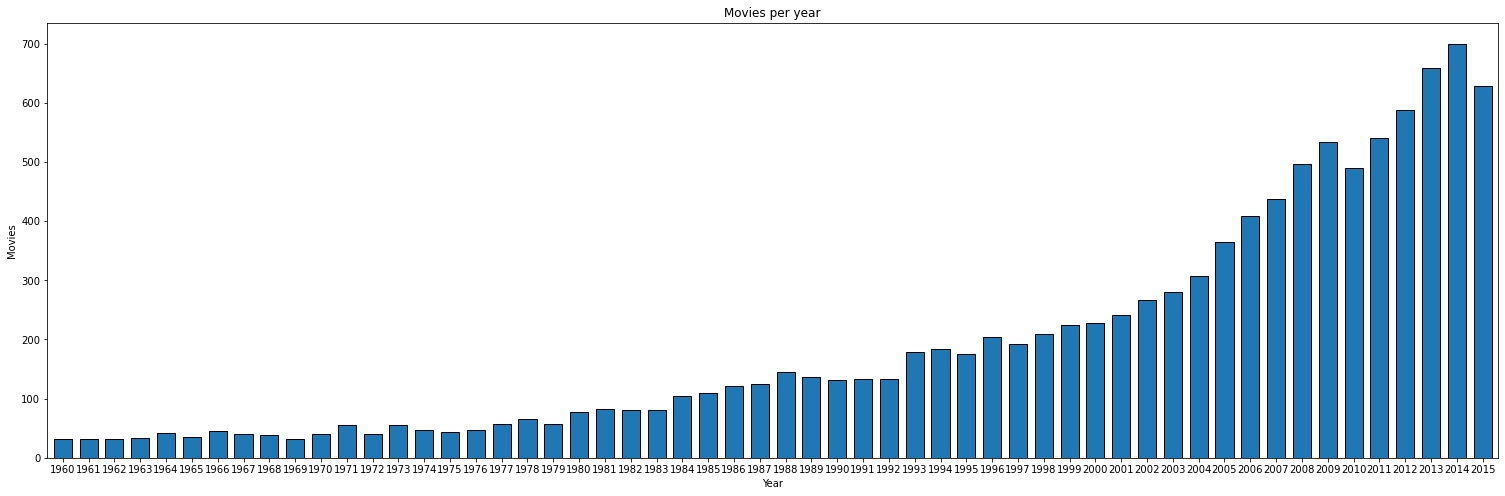

In [16]:
# Annual movies produced in ascending order
df['release_year'].value_counts().sort_index().plot.bar(title="Movies per year", xlabel="Year", ylabel="Movies", edgecolor='black', figsize=[26, 8], rot=0, width=0.7);

The preceding bar graph shows the increasing number of movies released since 1960 with most movies having been produced in 2014

### Which directors produced the most movies?

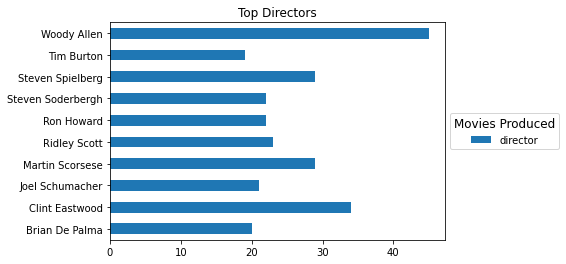

In [17]:
# Most frequent directors in the dataset
director_mode = df['director'].value_counts()[0:10].sort_index()
director_mode.plot(kind='barh', title="Top Directors");
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Movies Produced", title_fontsize = 12);


The preceding graph shows the directors with the most movies with director Woody Allen having produced the most movies.

### Does the length of a movie affect its rating?

In [18]:
def plotScatter(df, xVal, yVal):
    '''
    plotScatter will plot a scatter diagram of the given the following:
    df = dataframe name
    xVal = property on the x-axis of the scatter plot
    yVal = property on the y-axis of the scatter plot
    '''
    
    df.plot(x=xVal, y=yVal, kind="scatter", figsize=(14, 6), title=f"Relationship between {xVal} and {yVal}".title(), fontsize = 14);

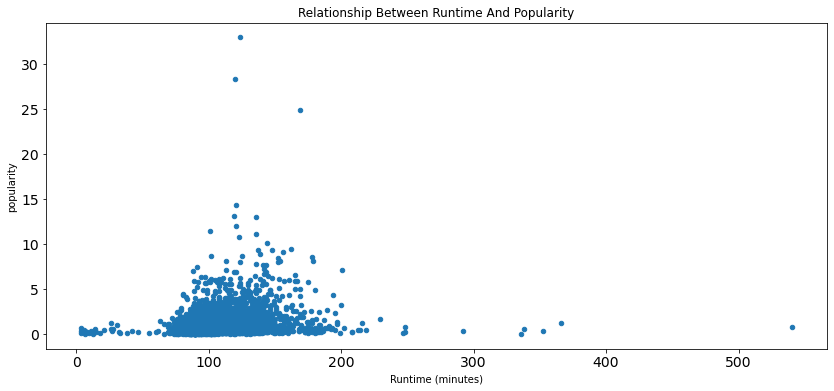

In [19]:
# Scatter plot of runtime against popularity
plotScatter(data, "runtime", "popularity")
plt.xlabel("Runtime (minutes)");

This graph shows that the most popular movies had a run time between 60 to 200 minutes 

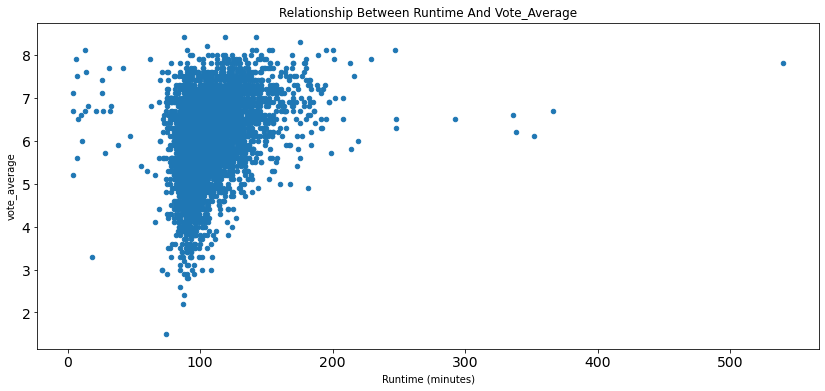

In [20]:
# Scatter plot of runtime against vote average
plotScatter(data, "runtime", "vote_average")
plt.xlabel("Runtime (minutes)");

This plot shows how the runtime of a movie is associated with vote average

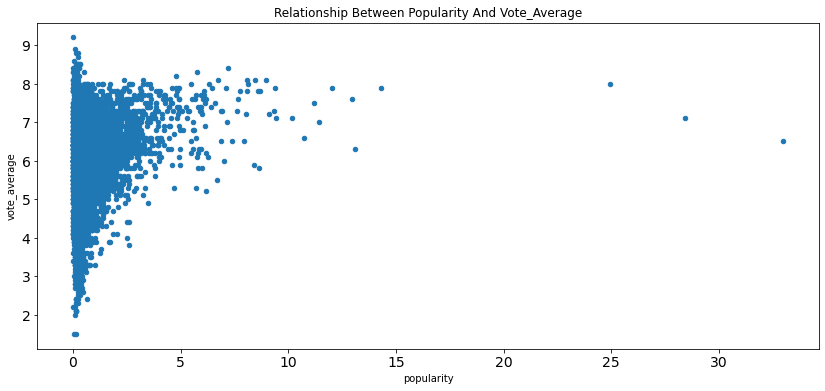

In [21]:
# Scatter plot of popularity vs vote average
plotScatter(df, "popularity", "vote_average")

 This scatter plot indicates that many movies with a high vote average were unpopular

### Is a higher budget associated with a higher revenue?

Text(0, 0.5, 'Revenue ($)')

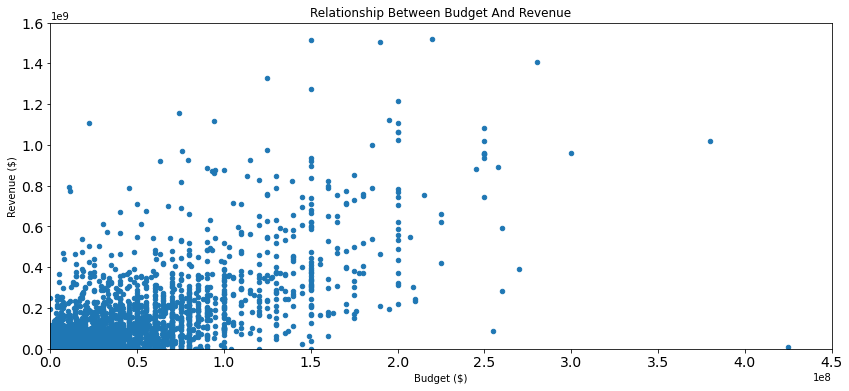

In [22]:
# Calling the plotScatter function
plotScatter(data, "budget", "revenue")

#adding limits
plt.xlim(0, 450000000)
plt.ylim(0, 1600000000)

plt.xlabel("Budget ($)")
plt.ylabel("Revenue ($)")

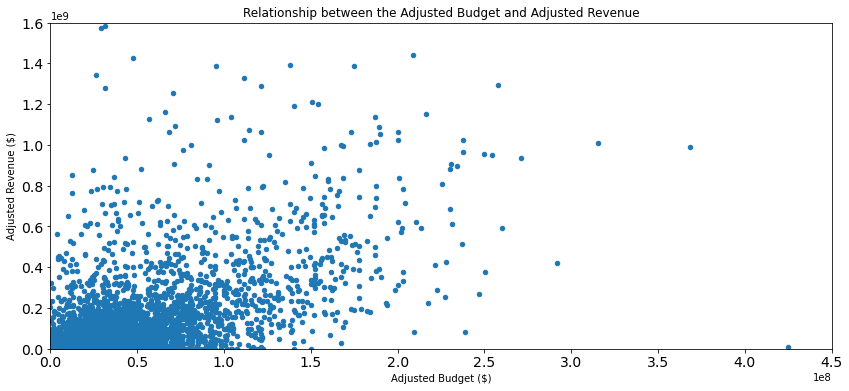

In [23]:
# Calling the plotScatter function for the adjusted budget and revenue
plotScatter(data, "budget_adj", "revenue_adj")

#adding limits
plt.xlim(0, 450000000)
plt.ylim(0, 1600000000)

plt.xlabel("Adjusted Budget ($)");
plt.ylabel("Adjusted Revenue ($)");
plt.title("Relationship between the Adjusted Budget and Adjusted Revenue");

The preceding plots shows increasing budgets along with increasing revenue.

### Which genres were produced the most?

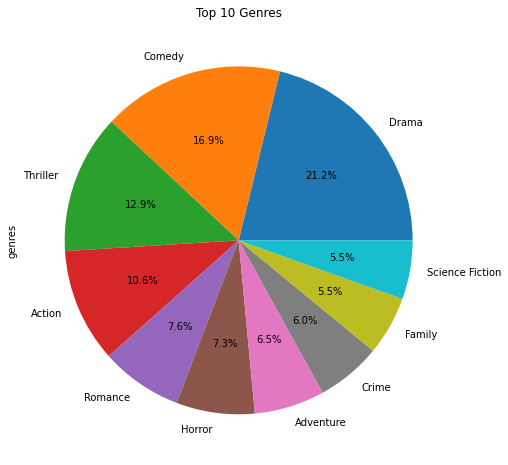

In [24]:
# Spliting genres string, at |, exploding the list to rows
genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')

most_genres = genres_df['genres'].value_counts()[0:10]
most_genres.plot(kind='pie', title='Top 10 Genres', autopct='%.1f%%', figsize=(8,8));

The pie chart above shows the top 10 most produced genres and Drama being the most produced genre.

**Most Popular Genres**

In [25]:
# Getting average popularity by grouping exploded dataframe by genres
genres_df.groupby('genres').popularity.mean()

genres
Action             0.926274
Adventure          1.154259
Animation          0.852182
Comedy             0.592607
Crime              0.744930
Documentary        0.181432
Drama              0.591495
Family             0.786668
Fantasy            0.992840
Foreign            0.191496
History            0.575936
Horror             0.465357
Music              0.487321
Mystery            0.690012
Romance            0.592082
Science Fiction    1.001548
TV Movie           0.270896
Thriller           0.741563
War                0.727683
Western            0.590615
Name: popularity, dtype: float64

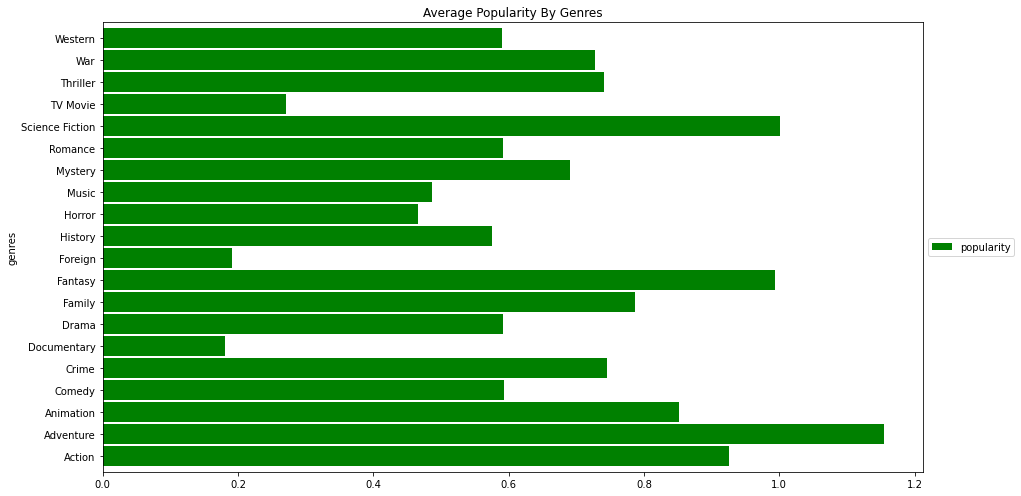

In [26]:
genres_df.groupby('genres').popularity.mean().plot.barh(title='Average Popularity By Genres', color=['g'],width=0.9,figsize=[14.70, 8.27], rot=0);

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title_fontsize = 12);


The graph above shows the average popularity for each genre, highlighting *Adventure* as the most popular genre.



In [27]:
# Top 20 collection of highly successfull movies
top_movies = df.revenue.nlargest(n=20).items()

for i, j in top_movies:
    print(df['original_title'][i])

Avatar
Star Wars: The Force Awakens
Titanic
The Avengers
Jurassic World
Furious 7
Avengers: Age of Ultron
Harry Potter and the Deathly Hallows: Part 2
Frozen
Iron Man 3
Minions
Transformers: Dark of the Moon
The Lord of the Rings: The Return of the King
Skyfall
The Net
The Dark Knight Rises
Pirates of the Caribbean: Dead Man's Chest
Toy Story 3
Alice in Wonderland
Pirates of the Caribbean: On Stranger Tides


<a id='conclusions'></a>



## Conclusions


From the analysis the histogram of the release_year column, it is observed that the number of movies produced annually since 1960 increased. Analyzing the data also showed that director Woody Allen produced the most movies.
From the scatterplots of runtime against popularity and runtime against vote_average, it is observed that the length of a movie affects its rating with the most popuar and highly voted movies having a runtime in the range 60 to 200 minutes. From the plot of budget against revenue, it was also observed that on average, increasing the budget also increases the revenue. From the top 10 genres pie chart, it is observed that the Comedy genre and Drama genre were produced the most. It is also observed that Avatar was the most successfull movie of all time in terms of revenue generated.
The limitation of this exploration was the lack of a direct relationship between the budget and the revenue. While a generalization of a direct relationship was made, there were multiple occurrences of high budgets with low revenues and low budgets with high revenues. There were also multiple entries with missing budgets and revenues in the data.